In [1]:
import shapely.geometry as sgmen
import shapefile
import pandas as pd
import glob

In [2]:
filepath=glob.glob(r'D:\WORKcode\pythoncode\ncdata\typath\CMA_csv\*')

In [3]:
st=shapefile.Reader("D:\\maplist\\coastline\\ne_110m_coastline.shp")

In [4]:
len(st.shapes())

134

In [5]:
colorlist=pd.read_csv('./color_list.txt',header=None)
colorlist

,0
0,#E5AF55
1,#EB20A6
2,#5CF667
3,#8E8E26
4,#72DD34
...,...
129,#55DAEC
130,#60AA53
131,#AC86F5
132,#3705AF


[65,66,94]

(109.47520958866365, 108.65520796105616, 108.62621748254044, 109.11905561730804, 110.21159874882281, 110.78655073450221, 111.01005130416458, 110.57064660038677, 110.33918786015147, 109.47520958866365)


TypeError: '<' not supported between instances of 'tuple' and 'int'

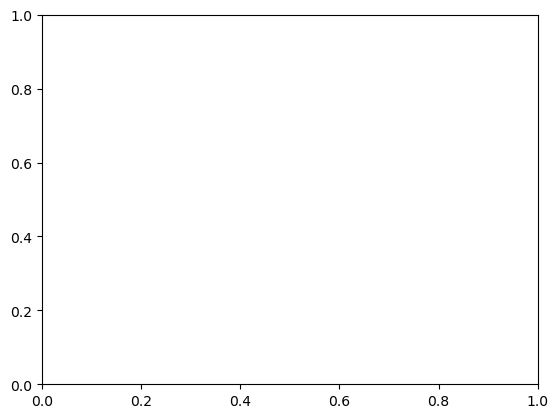

In [21]:
import matplotlib.pyplot as plt
st1=st
border = st1.shapes()
# .shapes()读取几何数据信息，存放着该文件中所有对象的 几何数据
# border是一个列表\
colorlist=pd.read_csv('./color_list.txt',header=None)
fig, ax = plt.subplots()# 生成一张图和一张子图
for i in [65,66,94]:
    # if i==94:
    #     continue
    # fig, ax = plt.subplots()# 生成一张图和一张子图
    # border_points = border[94].points
    # x, y = zip(*border_points)
    # plt.plot(x, y, color=colorlist.loc[i].values[0], label='fungis') 
    border_points = border[i].points
    x, y = zip(*border_points)
    # plt.plot(x,y,'k-') # x横坐标 y纵坐标 ‘k-’线性为黑色
    plt.plot(x, y, color='b', label='fungis')  # x横坐标 y纵坐标 ‘k-’线性为黑色
    ax.grid()  # 添加网格线
    ax.axis('equal')
    ax.set_title(str(i))
plt.show()

In [6]:
st1=st
border = st1.shapes()
border_points1= border[94].points
border_points2= border[66].points
border_points3= border[65].points

In [9]:
lat=[i[1] for i in border_points1] #+ [i[1] for i in border_points2] + [i[1] for i in border_points3]
lon=[i[0] for i in border_points1]#+ [i[0] for i in border_points2] + [i[0] for i in border_points3]

In [22]:
a=sgmen.LineString(border_points1)

In [11]:
a=sgmen.LineString(zip(lon,lat))

In [13]:
b=sgmen.LineString(zip([125,115],[0,40]))

In [24]:
c=a.intersection(b)

In [25]:
c.coords.xy

(array('d', [118.81299357579267]), array('d', [24.748025696829302]))

In [18]:
dir(c.coords)

['__array_interface__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__p__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cseq',
 '_ctypes',
 '_ndim',
 '_update',
 'array_interface',
 'ctypes',
 'xy']

In [31]:
help(sgmen.LineString)

Help on class LineString in module shapely.geometry.linestring:

class LineString(shapely.geometry.base.BaseGeometry)
 |  LineString(coordinates=None)
 |  
 |  A one-dimensional figure comprising one or more line segments
 |  
 |  A LineString has non-zero length and zero area. It may approximate a curve
 |  and need not be straight. Unlike a LinearRing, a LineString is not closed.
 |  
 |  Method resolution order:
 |      LineString
 |      shapely.geometry.base.BaseGeometry
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, coordinates=None)
 |      Parameters
 |      ----------
 |      coordinates : sequence
 |          A sequence of (x, y [,z]) numeric coordinate pairs or triples or
 |          an object that provides the numpy array interface, including
 |          another instance of LineString.
 |      
 |      Example
 |      -------
 |      Create a line with two segments
 |      
 |        >>> a = LineString([[0, 0], [1, 0], [1, 1]])
 |        >>> 